In [63]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib import pyplot as plt

In [64]:
# generation of data :
x, y = make_moons(n_samples=500, noise=0.30)

In [65]:
# inputs:
df=pd.DataFrame(x)
df.columns=["col 1","col 2"]
df

,col 1,col 2
0,0.547123,-0.454096
1,1.283426,-0.880019
2,-0.861702,0.271052
3,0.713450,0.978273
4,0.647139,0.613204
...,...,...
495,-0.648262,0.671984
496,1.620349,-0.786888
497,0.663188,0.301818
498,0.929221,-0.124480


In [66]:
# output initializatiom
output=pd.Series(y)
output

0      1
1      1
2      0
3      0
4      0
      ..
495    0
496    1
497    1
498    1
499    0
Length: 500, dtype: int64

In [81]:
# adding output to df
df["labels"]=output
df

,col 1,col 2,labels
0,0.547123,-0.454096,1
1,1.283426,-0.880019,1
2,-0.861702,0.271052,0
3,0.713450,0.978273,0
4,0.647139,0.613204,0
...,...,...,...
495,-0.648262,0.671984,0
496,1.620349,-0.786888,1
497,0.663188,0.301818,1
498,0.929221,-0.124480,1


In [68]:
# split data in classes:
c0=df[df["labels"]==0]
c1=df[df["labels"]==1]

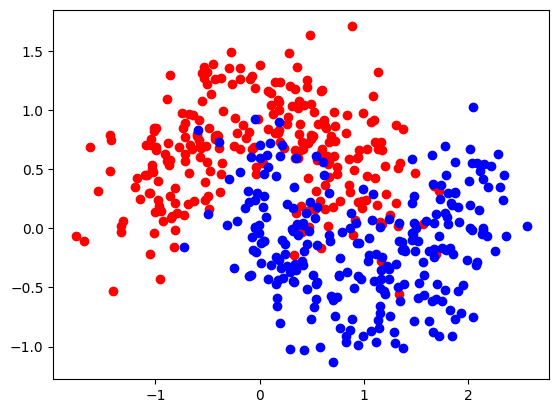

In [69]:
# checking data 
plt.scatter(c0["col 1"],c0["col 2"],c="r",label="class 0")
plt.scatter(c1["col 1"],c1["col 2"],c="b",label="class 1")
plt.show()

In [70]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(df[["col 1","col 2"]],output )

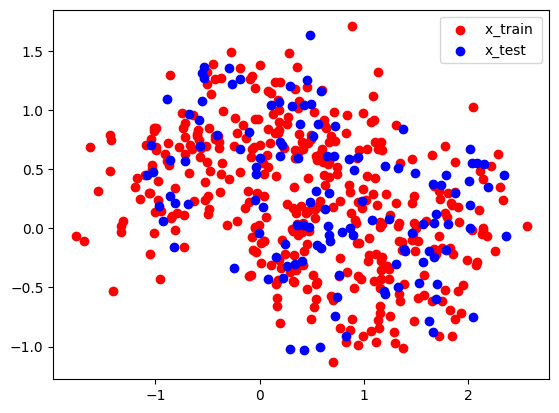

In [71]:
# checking data 
plt.scatter(x_train["col 1"],x_train["col 2"],c="r",label="x_train ")
plt.scatter(x_test["col 1"],x_test["col 2"],c="b",label="x_test")
plt.legend()
plt.show()

In [72]:
# creating models
log = LogisticRegression()
rnd = RandomForestClassifier(n_estimators=100)
svm = SVC()

In [73]:
# creating the voting classifier:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)],
    voting='hard')

In [74]:
# training
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('random_forest', RandomForestClassifier()),
                             ('support_vector_machine', SVC())])

In [75]:
# printing accuracy of each model:
for clf in (log, rnd, svm, voting):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.888
RandomForestClassifier 0.864
SVC 0.912
VotingClassifier 0.912


In [76]:
# testing classifiers:
x_test

,col 1,col 2
92,-0.184118,0.670462
380,2.345785,0.447170
245,1.869307,0.298083
173,0.187834,1.066087
294,-0.964377,0.189053
...,...,...
426,-0.807471,0.213629
264,-0.925007,0.060853
463,0.591135,-0.166347
157,1.742786,0.368629


In [80]:
# testing prediction
for clf in (log, rnd, svm, voting):
    print(clf.__class__.__name__,clf.predict([[2.345785,0.447170]]))
    

LogisticRegression [1]
RandomForestClassifier [1]
SVC [1]
VotingClassifier [1]


C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not ha